# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [78]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data["Mouse ID"].nunique()
print({number_of_mice_clean})

{249}


## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Group Complete data:
regimen_group = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Generate the summary statistics
mean_tumor_volume = regimen_group.mean()
median_tumor_volume = regimen_group.median()
variance_tumor_volume = regimen_group.var()
std_dev_tumor_volume = regimen_group.std()
sem_tumor_volume = regimen_group.sem()

#Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
# Display the summary DataFrame
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# Group the data by "Drug Regimen" and apply multiple statistical functions using agg()
summary_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Standard_Deviation="std",
    SEM="sem"
)
# Display the advanced summary statistics table
summary_stats_advanced
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Group the data by "Drug Regimen" and calculate the SEM of the tumor volume
sem_summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(SEM="sem")
# Display the SEM for each drug regimen
sem_summary
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean", 
    Median="median", 
    Variance="var", 
    Standard_Deviation="std", 
    SEM="sem"
)
# Display the summary statistics table
summary_stats_single_line

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

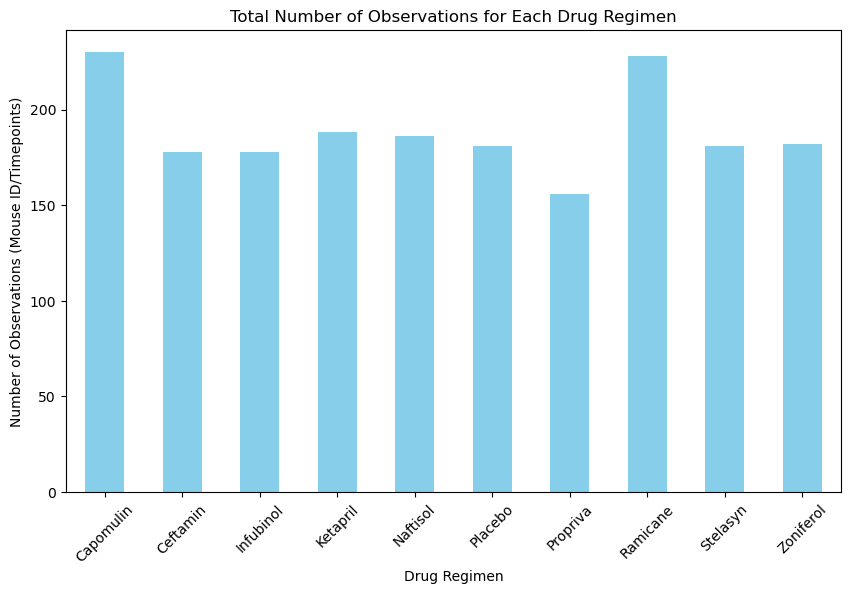

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data.groupby("Drug Regimen").size()

# Create a bar plot for the total number of rows per drug regimen
regimen_counts.plot(kind="bar", color='skyblue', figsize=(10, 6))

# Adding titles and labels
plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

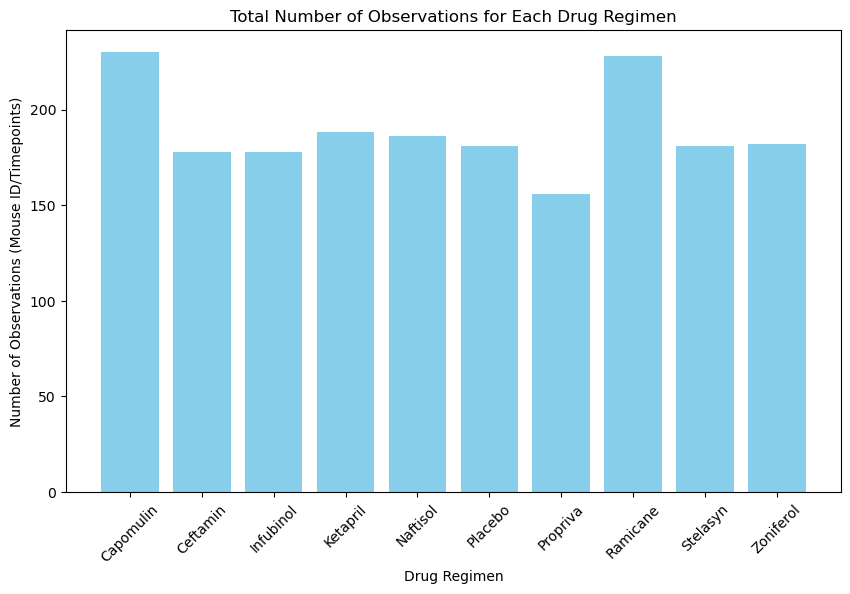

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the total number of rows for each drug regimen
regimen_counts = clean_data.groupby("Drug Regimen").size()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']


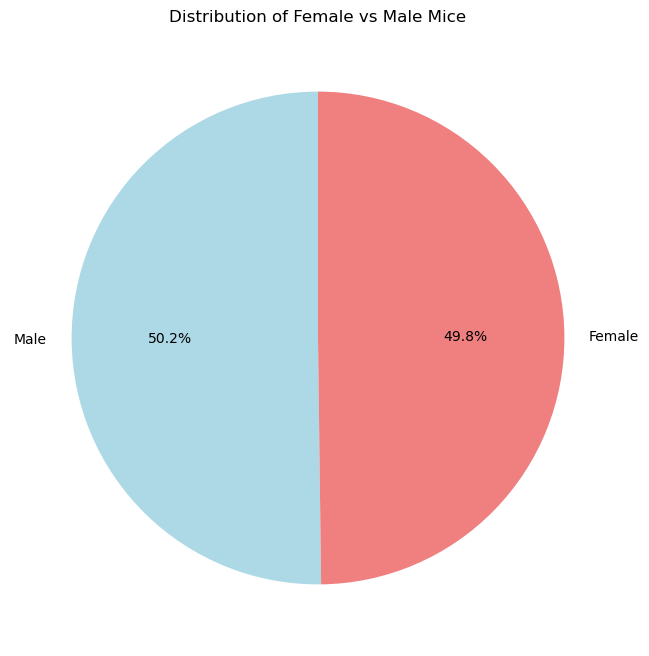

In [85]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
print(clean_data.columns.tolist())
#Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])  # Drop duplicates to get unique mice
#Count the number of male and female mice
gender_counts = unique_mice["Sex"].value_counts()
# Make the pie chart
# Generate a pie chart to show the gender distribution
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()

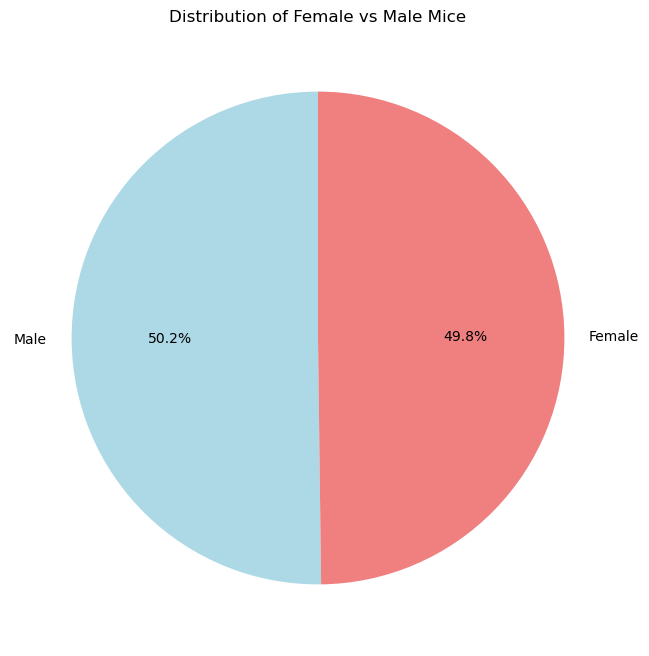

In [86]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])  # Drop duplicates to get unique mice

# Get the unique mice with their gender
# Count the number of male and female mice
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
# Create a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Adding title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('') 
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_timepoints, filtered_data, on=["Mouse ID", "Timepoint"])
final_tumor_volumes = final_tumor_volumes[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

# Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_data[clean_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

# add subset
    tumor_volumes.append(treatment_data)
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
# Calculate the IQR
    IQR = Q3 - Q1
# Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
# Print results for each treatment
print(f"{treatment}:")
print(f"  IQR: {IQR}")
print(f"  Lower Bound: {lower_bound}")
print(f"  Upper Bound: {upper_bound}")
print(f"  Outliers: {outliers.values}\n")
    

Ceftamin:
  IQR: 9.593010457500007
  Lower Bound: 32.81891142624998
  Upper Bound: 71.19095325625001
  Outliers: []



<Figure size 1000x600 with 0 Axes>

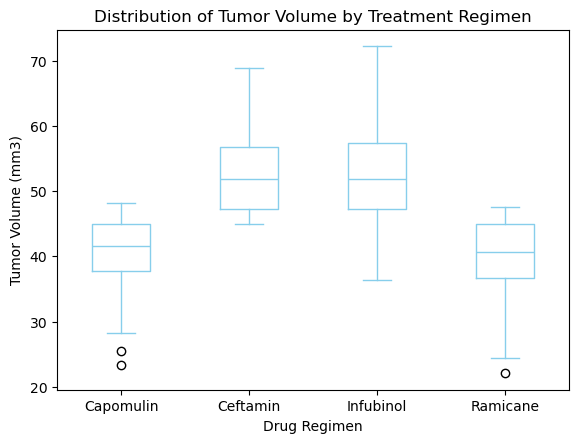

In [89]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatments)]
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", grid=False, color='skyblue')
plt.title('Distribution of Tumor Volume by Treatment Regimen')
plt.suptitle('')  # Suppress the default title to clean up the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()              

## Line and Scatter Plots

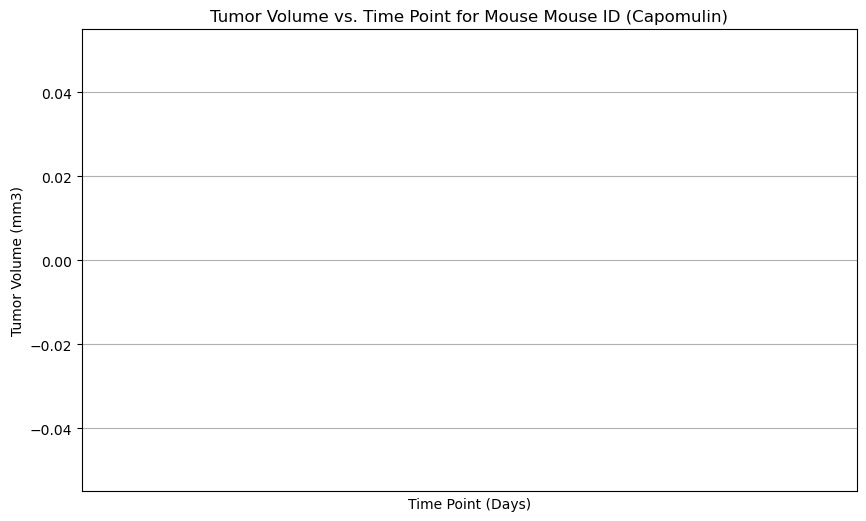

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "Mouse ID"  
capomulin_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == mouse_id)]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', color='Green', linewidth=2)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(capomulin_data["Timepoint"])
plt.grid()
plt.show()

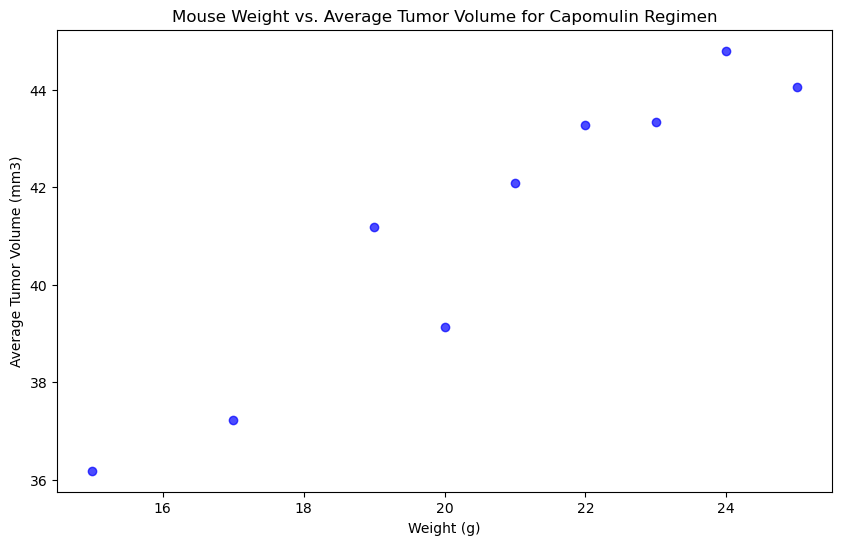

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot 
plt.show()


## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
